

<i><b>Public-AI</b></i>

### week 4. DNN Basis
# Section 3. 심층 신경망 분류기 만들기

지금까지는 딥러닝 모델을 이해하는 데 바탕이 되는 선형 회귀모델과 로지스틱 회귀모델을 알아보고, 딥러닝 프레임워크인 케라스를 이용해 각각의 모델을 구성하고 성능을 평가해보았습니다. 이번에는 (1) 신경망의 기본 구조와 신경망에서의 가중치, 활성화 함수 등의 역할을 알아보고, (2) 딥러닝 케라스를 이용해 심층 신경망 분류 모델을 만들어보겠습니다. 

### _Objective_
1. **신경망의 구조** : 신경망의 기본 구조와 가중치, 활성화 함수의 개념을 익힙니다. 
2. **심층 신경망 분류기 만들기** : 케라스를 이용해 심층 신경망 모델을 구성하고, 하이퍼파라미터를 결정하여 모델을 학습시켜봅니다. 


In [1]:
%matplotlib inline

import os
import numpy as np
import pandas as pd
from tensorflow.keras.utils import get_file

import matplotlib.pyplot as plt

# \[ 1. 신경망의 구조 \]
----
먼저 (1) 신경망의 기본 구조를 알아보고, 이를 도식과 수식으로 표현하는 대략적인 방법과 딥러닝 프레임워크인 Keras에서 각 구성 요소를 코드로 표현하는 방식을 살펴보겠습니다. 그 다음에는 (2) 도식과 Keras를 이용해 신경망의 세부 구성요소(신경망의 가중치, 활성화 함수 등)를 좀 더 자세히 알아보도록 하겠습니다.

## 1. 신경망의 기본 구조
신경망을 이미지나 도식으로 표시할 때에 주로 이용되는 몇 가지 관례(Convention)가 있습니다. 논문이나 책의 저자 마다 약간씩 표기방법(Notation)이 다르지만, 대체로 사용되고 있는 표기를 이해하고 있어야 논문이나 자료를 이해할 수 있을 것입니다. <br>
이번에는 신경망의 구조를 배우면서 신경망을 구성하는 각 요소를 표기하는 방법까지 알아보겠습니다. <br>
<br>
모든 신경망은 3가지 종류의 층을 가지고 있습니다. <br>

    1. 입력층(Input Layer) : 입력 신호를 받는 층 
    2. 은닉층(Hidden Layer) : 입력층과 출력층 사이를 구성하는 층
    3. 출력층(Output Layer) : 출력 값을 반환하는 층


### (1) Keras로 2층 신경망 표현하기

<img src="https://i.imgur.com/LeSOS7p.png" width="300">

`tensorflow.keras`를 이용해 위와 같이 생긴 2층 신경망을 구성해봅시다.

In [2]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model

In [3]:
# 입력값의 형태 결정하기
inputs = Input(shape=(2,),name='inputs')

# 은닉층의 형태 결정하기
hidden = Dense(3, activation='relu',name='hidden')(inputs)

# 출력값의 형태 결정하기 
outputs = Dense(1, activation='sigmoid',name='output')(hidden)

# 모델 구성하기
model = Model(inputs,outputs)

W0203 10:05:49.895879 4521817536 deprecation.py:506] From /Users/ksj/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/init_ops.py:1251: calling VarianceScaling.__init__ (from tensorflow.python.ops.init_ops) with dtype is deprecated and will be removed in a future version.
Instructions for updating:
Call initializer instance with the dtype argument instead of passing it to the constructor


`tensorflow.keras`로 구성한 신경망`model`의 정보를 간략하게 보고 싶다면, `.summary()` 메소드를 이용합니다. 각 층은 `inputs`, `hidden`, `output`으로 이름붙였기 때문에 좌측에 Layer의 이름이 출력됨을 알 수 있습니다. 가중치를 가지는 층은 `hidden`, `output` 층으로, 이 두 층에만 `Param #`에 값이 가중치의 갯수가 적혀있습니다. 가중치를 갖는 층은 2개 층이므로 이를 2층 신경망이라고 부릅니다. 

In [4]:
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 2)]               0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 9         
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 13
Trainable params: 13
Non-trainable params: 0
_________________________________________________________________


### (2) Keras로 5층 신경망 표현하기
은닉층은 꼭 1개일 필요가 없습니다. 딥러닝에서 Deep은 은닉층이 수없이 많이 쌓여있다는 의미의 Deep입니다. <br>
5층짜리 신경망을 한번 구성해보도록 하겠습니다.

<img src = 'https://i.imgur.com/05yfPcE.png' width = 800>

`hidden, hidden1, hidden2, hidden3`로 총 4개의 은닉층을 만들어, 출력층까지 합쳐 5층 신경망이 만들어봅시다. 각 은닉층은 3개의 유닛으로 구성합니다. 

In [5]:
# 입력값의 형태 결정하기
inputs = Input(shape=(2,),name='inputs')

# 은닉층의 형태 결정하기
hidden1 = Dense(3, activation='relu', name='hidden')(inputs)
hidden2 = Dense(3, activation='relu', name='hidden1')(hidden1)
hidden3 = Dense(3, activation='relu', name='hidden2')(hidden2)
hidden4 = Dense(3, activation='relu', name='hidden3')(hidden3)

# 출력값의 형태 결정하기 
outputs = Dense(1, activation='sigmoid', name='output')(hidden4)

# 모델 구성하기
model = Model(inputs,outputs)

In [6]:
model.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
inputs (InputLayer)          [(None, 2)]               0         
_________________________________________________________________
hidden (Dense)               (None, 3)                 9         
_________________________________________________________________
hidden1 (Dense)              (None, 3)                 12        
_________________________________________________________________
hidden2 (Dense)              (None, 3)                 12        
_________________________________________________________________
hidden3 (Dense)              (None, 3)                 12        
_________________________________________________________________
output (Dense)               (None, 1)                 4         
Total params: 49
Trainable params: 49
Non-trainable params: 0
_______________________________________________________________

위 결과에 나온 파라미터, 즉 편향(bias)와 가중치(weight)에 대해 좀 더 자세히 알아봅시다.

## 2. 신경망의 가중치

신경망에서 각 층의 연결은 가중치(Weight)로 이루어져 있습니다. <br>
신경망을 도식화할 때 그려지는 모든 화살표는 가중치를 의미한다고 생각하면 됩니다.

<img src = 'https://i.imgur.com/x8Ytmtr.png' width =600>

우선 첫번째 은닉층에 집중해서 보도록 하겠습니다. 첫 번째 층에는 유닛이 3개이며, 2개의 입력값을 받고 있습니다. 따라서 첫번째 층의 연산은 아래와 같이 진행됩니다.

$$
z_1^{[1]} = w^{[1]}_{1,0} +  w^{[1]}_{1,1} x_1 + w^{[1]}_{1,2} x_2 \\
z_2^{[1]} = w^{[1]}_{2,0} +  w^{[1]}_{2,1} x_1 + w^{[1]}_{2,2} x_2 \\
z_3^{[1]} = w^{[1]}_{3,0} +  w^{[1]}_{3,1} x_1 + w^{[1]}_{3,2} x_2 \\
$$

$$
a_1^{[1]} = \sigma(z_1^{[1]}) \\
a_2^{[1]} = \sigma(z_2^{[1]}) \\
a_3^{[1]} = \sigma(z_3^{[1]}) \\
$$

이렇게 숫자가 많을 때에는 수식의 편리함을 위해 보통 행렬(Matrix)를 이용하게 됩니다. 행렬로 위의 수식을 정리하면 아래와 같이 됩니다.

$$
\begin{bmatrix}
z_1^{[1]} \\
z_2^{[1]} \\
z_3^{[1]} \\
\end{bmatrix} =
\begin{bmatrix}
w_{1,1}^{[1]} &  w_{1,2}^{[1]} \\
w_{2,1}^{[1]} &  w_{2,2}^{[1]} \\
w_{3,1}^{[1]} &  w_{3,2}^{[1]} \\
\end{bmatrix} \cdot \begin{bmatrix}
x_1 \\
x_2 \\
\end{bmatrix} + \begin{bmatrix}
w_{1,0}^{[1]} \\
w_{2,0}^{[1]} \\
w_{3,0}^{[1]} \\
\end{bmatrix} 
$$

위 처럼 수식을 정리할 수 있고 이를 대문자로 표기하게 되면 아래와 같이 간결하게 수식이 정리됩니다.
$$
Z^{[1]}= W^{[1]} X + W^{[1]}_0
$$

그리고 활성화함수라 불리는 $\sigma()$를 거치면 수식이 정리가 됩니다.
활성화 함수에 대해서는 잠시 후 보다 자세히 알아보겠습니다. 

$$
\begin{bmatrix}
a_1^{[1]} \\
a_2^{[1]} \\
a_3^{[1]} \\
\end{bmatrix} = 
\begin{bmatrix}
\sigma(z_1^{[1]}) \\
\sigma(z_2^{[1]}) \\
\sigma(z_3^{[1]}) \\
\end{bmatrix}
$$

$$
A^{[1]} = \sigma(Z^{[1]})
$$

케라스를 이용해 위 모델을 만들고, 위 수식의 Weight가 어떤 형태를 가지는지 확인해보도록 하겠습니다.

In [7]:
# 입력값의 형태 결정하기
inputs = Input(shape=(2,),name='inputs')

# 은닉층의 형태 결정하기
hidden = Dense(3, activation='relu',name='hidden')(inputs)

# 출력값의 형태 결정하기 
outputs = Dense(1, activation='sigmoid',name='output')(hidden)

# 모델 구성하기
model = Model(inputs,outputs)

In [8]:
hidden_weight, hidden_bias = model.get_layer('hidden').get_weights()
output_weight, output_bias = model.get_layer('output').get_weights()

은닉층은 입력값이 2개, 출력값이 3개이므로 `(2, 3)`의 형태를 보이며, 출력층은 입력값 3개, 출력값 1개이므로 `(3, 1)`의 형태를 보입니다. 

In [9]:
print("은닉층 weight의 크기 : ",hidden_weight.shape)
print("은닉층 bias의 크기 : ",hidden_bias.shape)

print("출력층 weight의 크기 : ",output_weight.shape)
print("출력층 bias의 크기 : ",output_bias.shape)

은닉층 weight의 크기 :  (2, 3)
은닉층 bias의 크기 :  (3,)
출력층 weight의 크기 :  (3, 1)
출력층 bias의 크기 :  (1,)


## 3. 활성화 함수
신경망을 구성하는 요소 중 하나인 가중치에 대해 알아보았으니, 이번에는 활성화 함수에 대해 알아보겠습니다. 
### (1) 활성화 함수란?

활성화 함수에는 다양한 종류가 있습니다. 이전 시간에 배운 로지스틱 함수도 일종의 활성화 함수입니다.

$$
\sigma(x)={\frac {1}{1+e^{-x}}}={\frac {e^{x}}{e^{x}+1}}
$$

위 수식을 python의 함수로 정의하면 아래와 같이 정의할 수 있으며, 그래프를 그려보면 아래와 같이 그릴 수 있습니다.

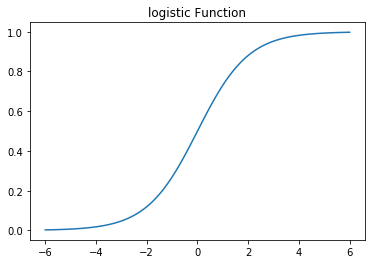

In [10]:
def logistic(x):
    return 1/(1+np.exp(-x))

x = np.linspace(-6.0,6.0,101)
y = logistic(x)

plt.title("logistic Function")
plt.plot(x,y)
plt.show()

### (2) 활성화 함수를 사용해야 하는 이유

신경망의 최종 결과를 활성화 함수로 값을 변환하여야 하는 이유는 무엇일까요? 시그모이드 함수와 같은 활성화 함수가 없다면, 신경망은 아래와 같이 행렬곱과 덧셈 2개로만 이루어진 선형적인 연산 결과만을 반환하게 됩니다.<br>

<img src = 'https://i.imgur.com/GiCWUMK.png' width = 800> 

<br>
즉, 입력에 대한 선형변환만을 학습할 수 있게 되는 것이죠. 이렇게 되면, 선형 변환층은 층을 계속 추가한다고 해도 여전히 하나의 선형 변환이 됩니다.<br>
이게 왜 문제가 될까요? 이는 신경망에서 층을 여러개로 쌓는 장점이 사라지게 만듭니다.<br>
층을 여러개로 쌓는 작업의 장점을 살리기 위해서는 비선형성 또는 활성화 함수를 추가해야 합니다.<br>
층을 여러개로 쌓는 것에 대한 장점과 비선형성 함수를 추가해야 하는 이유는 "Appendix"를 참고하시기 바랍니다.

### (3) 활성화 함수의 종류

활성화 함수에는 앞서 살펴본 시그모이드 함수 외에도 시그모이드 함수, 탄 함수, 렐루 함수, 리키 렐루 함수 등이 있습니다. Keras에서는 이러한 다양한 활성화 함수를 지원합니다. 활성화 함수에 대한 API는 `keras.activations`에 있습니다. 자주 쓰이는 다양한 활성화함수에 대해 알아보도록 하겠습니다.

<img src="https://i.imgur.com/d04ZKEM.png" width="800" height="600"/><br>

* 시그모이드 함수(Sigmoid Function)

로지스틱 회귀분석에서 이용했던 로지스틱 함수(Logistic Function)도 일종의 활성화함수입니다. 변환된 함수의 형태가 S자 형태라는 닮았다는 것에서 비롯해서, 
시그모이드 함수(Sigmoid Function)이라고 부릅니다. 

* 하이퍼볼릭 탄젠트 함수(TanH Function)

하이퍼볼릭 탄젠트 함수는 시그모이드 함수의 크기와 위치를 조절한 함수입니다. 시그모이드 함수의 출력값이 0부터 1사이의 값이었다면, 하이퍼볼릭 탄젠트 함수의 출력값은 -1부터 1사이의 출력값을 가집니다.

* 렐루 함수(ReLU Function)

현대 딥러닝에서는 활성화 함수로 로지스틱 함수(Logistic Function)보다는 렐루 함수(ReLU Function)가 많이 사용됩니다. 렐루 함수는 0을 기준으로 출력을 활성화하고 아니면 출력을 0으로 제한하는 함수를 의미합니다.

# \[ 2. 심층 신경망 분류기 만들기 \]
---

### 예제 데이터 ) 암 환자 데이터 셋

나이와 종양크기를 바탕으로 암 환자의 종양이 양성인지 음성인지를 분류하는 데이터셋입니다.

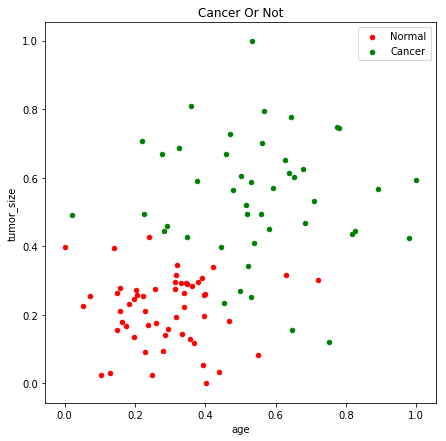

In [11]:
fpath = get_file('cancer_dataset.csv',
                 'https://s3.ap-northeast-2.amazonaws.com/pai-datasets/alai-deeplearning/cancer_dataset.csv')
cancer_df = pd.read_csv(fpath)

X = cancer_df[['age','tumor_size']]
y = cancer_df["label"]

X = (X - X.min()) / (X.max() - X.min())

### 데이터 시각화
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)

# 0: 정상
X[y==0].plot('age','tumor_size',ax=ax,legend=True,
                           kind='scatter',color='red')
# 1: 암환자
X[y==1].plot('age','tumor_size',ax=ax,legend=True,
                           kind='scatter',color='green')
plt.legend(['Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

## 1. 케라스로 딥러닝 모델 생성하기


In [12]:
from tensorflow.keras.layers import Input
from tensorflow.keras.layers import Dense
from tensorflow.keras.models import Model
from tensorflow.keras import backend as K
from tensorflow.keras.utils import plot_model

### (1) 입력층 구성하기

In [13]:
inputs = Input(2, name='x')

### (2) 은닉층 구성하기

은닉 층에는 필수적으로 활성화 함수를 넣어주어야 합니다.<br>
활성화 함수가 존재하지 않으면 비선형 관계를 학습하지 못합니다.

In [14]:
dense1 = Dense(200, activation='relu', name='dense_1',)
dense1_output = dense1(inputs)

### (3) 출력층 구성하기

In [15]:
dense2 = Dense(1, activation='sigmoid', name='dense_2')
dense2_output = dense2(dense1_output)

### (4) 모델 구성하기

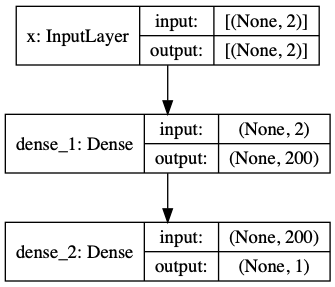

In [16]:
model = Model(inputs, dense2_output, name='model')

plot_model(model,show_shapes=True)

## 2. 학습을 위해 Model 학습과정 설정하기
---

keras에서는 `compile()`함수를 사용해 학습하기 전에 학습에 대한 설정을 수행합니다. (1) 최적화 함수, (2) 손실 함수, (3) 평가 지표 등을 결정하여 모델을 준비하는 방법을 알아보고, (4) 준비된 최적화 함수, 손실 함수, 평가지표 등으로 구성된 모델을 컴파일하는 방법을 알아봅시다. 

### (1) 최적화 함수 결정하기

신경망 학습의 목적은 Loss Function의 결과값을 최소화하는 매개변수를 찾는 것입니다. 즉, 매개변수의 최적값을 찾는 것이 신경망 학습의 주된 문제이며 이러한 문제를 푸는 것을 **최적화**라고 합니다.최적화를 도와주는 함수로는 `SGD`, `momentum`, `NAG`, `Adagrad`, `RMSprop`, `Adam`등이 있습니다. 

keras에서는 아래와 같이 최적화 함수를 적용할 수 있습니다.

In [17]:
from tensorflow.keras.optimizers import SGD
from tensorflow.keras.optimizers import RMSprop, Adam

optim = SGD(learning_rate=1e-2)
optim = RMSprop(learning_rate=1e-2, rho=0.9)
optim = Adam(learning_rate=1e-2, beta_1=0.9, beta_2=0.999)

최적화 함수와 같이 직접 설정해주어야 하는 매개변수를 **하이퍼파라미터**라고 합니다. 하이퍼파라미터는 편향(bias)나 가중치(weight) 같은 신경망의 매개변수와는 성질이 다른 매개변수입니다. 신경망의 가중치는 훈련데이터와 학습 알고리즘에 의해서 자동으로 획득되는 매개변수인 반면, 최적화 함수와 같은 하이퍼파라미터는 사람이 직접 설정해야 하는 매개변수입니다. 일반적으로 이 하이퍼파라미터들은 여러 후보 값 중에서 시험을 통해 가장 잘 학습하는 값을 찾는 과정을 거쳐야 하는데, 이 과정을 하이퍼파라미터 최적화라고 합니다.

### (2) 손실함수 결정하기

손실함수에는 MSE외에 `mean_absolute_error`, `categorical_crossentropy`, `binary_crossentropy`등의 종류가 있습니다. MAE(`mean_absolute_errer`)는 MSE에서 제곱 대신 절댓값을 취한 함수로 특이점에 크게 영향을 받지 않는다는 장점이 있습니다. 보통 classification문제를 해결할 때 crossentropy 함수들을 사용합니다. <br>

아래의 표는 모델에 맞는 마지막 층의 활성화 함수와 손실 함수 선택을 정리한 표입니다.

| 문제 유형 | 마지막 층의 활성화 함수 | 손실 함수 |
| --- | --- | --- |
| 이진 분류 | 시그모이드 | binary_crossentropy |
| 단일 label 다중 분류 | 소프트맥스 | categorical_crossentropy |
| 다중 label 다중 분류 | 시그모이드 | binary_crossentropy |
| 임의 값에 대한 회귀 | 없음 | mse |
| 0과 1 사이 값에 대한 회귀 | 시그모이드 | mse 또는 binary_crossentropy|

In [18]:
from tensorflow.keras.losses import BinaryCrossentropy

loss_func = BinaryCrossentropy()

### (3)  평가 지표 결정하기

keras에서는 `tensorflow.keras.metrics`를 통해 평가 지표를 설정할 수 있습니다. 주요 평가지표로는 정확도를 나타내는 accuracy, binary_accuracy, categorical_accuracy, 상위 k개 예측값의 정확도를 나타내는 top_k_categorical_accuracy등이 있습니다.

In [19]:
from tensorflow.keras.metrics import BinaryAccuracy

metric_func = BinaryAccuracy()

### (4) 모델 컴파일하기

keras의 `compile()` 과정에서 우리는 하이퍼파라미터인 최적화 함수, 손실함수, 평가 지표를 설정합니다. 이 과정에서 케라스의 기본 백엔드인 tensorflow에서는 최적화 함수, 손실함수, 평가 지표를 연결하여 계산 그래프 구성을 마무리하는 작업이 수행됩니다.

In [20]:
model.compile(optimizer=optim,
              loss=loss_func,
              metrics=[metric_func])

W0203 10:06:07.507877 4521817536 deprecation.py:323] From /Users/ksj/anaconda3/lib/python3.6/site-packages/tensorflow/python/ops/nn_impl.py:180: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


## 3. Model 학습시키기
---

keras에서는 `fit()`함수를 사용해 훈련셋을 이용하여 구성한 모델로 학습시킵니다.

`fit()` 함수의 주요 인자로는 epoch와 batch_size가 있습니다. 전체 훈련 데이터에 수행되는 각 반복을 **에포크(Epoch)**라고 합니다. 각 epoch마다 네트워크가 배치에서 손실에 대한 가중치의 그래디언트를 계산하고 그에 맞추어 가중치를 업데이트 합니다. batch_size는 기본 32로 설정되어 있습니다. 한 번에 32개의 데이터씩 처리한다는 의미입니다. 

In [21]:
history = model.fit(X, y, epochs=1000, verbose=0)

한편, keras에서는 `history`함수를 사용해 모델 학습 시 훈련셋, 검증셋의 손실 및 정확도를 측정합니다. 반복횟수에 따른 손실 및 정확도 추이를 보면서 학습 상황을 판단합니다.<br>

아래 그래프를 보면, `epoch = 1000`으로 설정함에 따라, 1000번 반복하여 모델을 훈련하는 과정에서 손실이 줄어드는 것을 확인할 수 있습니다. 

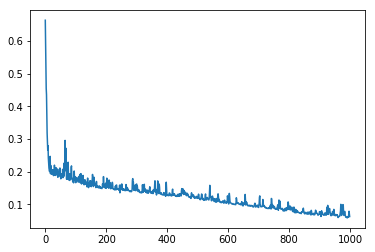

In [22]:
plt.plot(history.history['loss'])
plt.show()

아래 그래프를 보면 1000번을 반복하여 모델을 훈련하는 과정에서 정확도가 올라가는 것을 확인할 수 있습니다.  

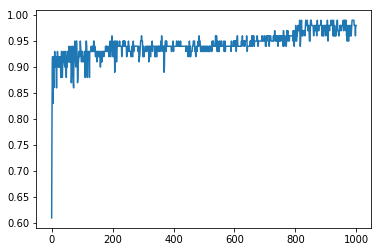

In [23]:
plt.plot(history.history['binary_accuracy'])
plt.show()

## 4. 결과 확인하기
---

자, 이제 모델을 만들고 학습시켜 보았습니다. `results = model.predict(xs)`를 이용해 만들어진 모델에 데이터를 넣고 결과값을 예측해봅시다. 그래프를 보면, 단순히 직선으로 암 환자와 정상을 구분하지 않고, 다수의 곡선으로 경계가 나뉘어진 것을 확인할 수 있습니다. 

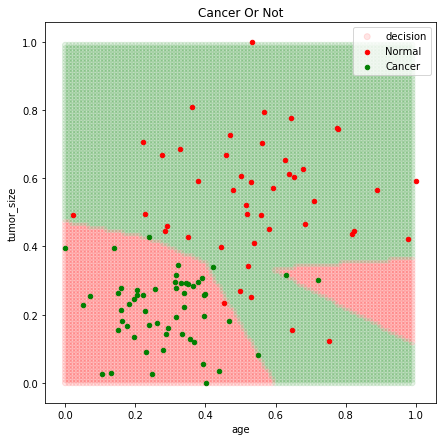

In [24]:
x1s,x2s = np.mgrid[0:1:0.01,0:1:0.01]
xs = np.stack([x1s.ravel(),x2s.ravel()],axis=1)

results = model.predict(xs) # 결과 예측

colors = []
for result in results.ravel():
    if result > 0.5:
        colors.append('g')
    else:
        colors.append('r')
        
fig = plt.figure(figsize=(7,7))
ax = fig.add_subplot(1,1,1)
ax.scatter(xs[:,0],xs[:,1],c=colors,alpha=0.1)

# 0: 정상
X[y==1].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='red')
# 1: 암환자
X[y==0].plot('age','tumor_size',ax=ax,legend=True,
                                   kind='scatter',color='green')
plt.legend(["decision",'Normal','Cancer'])
plt.title("Cancer Or Not")
plt.show()

# [Appendix. 비선형 활성화 함수의 이점]

활성화 함수를 통해 퍼셉트론의 출력값을 제한할 수 있다고 배웠습니다. 딥러닝에서 사용되는 활성화 함수는 출력값을 제한하는 것 외에도, **비선형 함수**라는 공통점이 있습니다. 신경망에서는 활성화 함수로 비선형 함수를 사용하는 것이 필수입니다. 왜냐하면 선형 함수로는 층을 깊게 쌓을 수 없기 때문입니다.

층을 깊게 쌓을 수 없다는 것이 어떤 의미일까요? 선형 함수를 이용해 2개 층을 쌓아봅시다. 

선형 함수 $f(x) = 2x+3$를 하나 정의하여 한 층을 구성하고, 이 함수의 출력값을 다시 입력받아 출력하는 $g(x) = f(f(x))$을 2 번째 층으로 만들어보겠습니다.

$$
f(x) = 2x+3
$$

$$
g(x) = f(f(x)) \\
\ \ \ \ = 2(2x+3)+3 \\
\ \ \ \ = 4x + 9
$$

**층을 두 개 만들어 쌓았지만, 하나의 층이 있는 것과 동일하게 직선의 형태를 결과로 반환하게 되는 것이죠.** 반면, 비선형 함수는 층을 쌓을 수록 직선 외의 다양한 곡선의 형태를 만들어 낼 수 있다는 특징을 가집니다. 

## 쌓아서 생기는 이점 : Universial Approximation Theorem

### (1)  보편 근사 정리 의미 (시벤코 정리)

시벤코 정리는 하나의 은닉층을 갖는 인공신경망은 임의의 연속인 다변수 함수를 원하는 정도의 정확도로 근사할 수 있음을 말합니다. 즉 인공신경망은 선형 회귀와 달리, **비선형 함수**도 근사할 수 있다는 것을 말합니다.

<img src="https://i.imgur.com/Ha4ubDo.png" width="600" height="450"/>

### (2) 신경망의 너비와 깊이의 비교

신경망의 유닛 수가 증가할수록, 근사하고자 하는 함수와 근사 수준이 높아집니다. 그렇다면 유닛수는 많으면 많을수록 좋을까요? 지나치게 유닛이 많아 가중치(weight)의 수가 증가하면, Overfitting 문제가 발생하기 쉬워집니다. 즉, 현재 가지고 있는 데이터셋에는 효과적이지만 새로운 데이터셋에는 효과적이지 않은 모델이 만들어지는 것이죠. 따라서 무작정 유닛수를 높인다고 좋은 것은 아닙니다.<br>

<img src="https://i.imgur.com/udj3bZN.png" width="800" height="600"/>

Reference : On the number of Linear Regions of deep Neural Networks

유닛의 수를 늘리는 방법에는 신경망의 너비를 넓히는 방법과 깊이를 깊게 하는 방법이 있습니다. 신경망의 너비를 넓힌다는 것은 한 층을 구성하는 유닛의 수를 늘린다는 것이고, 깊이를 깊게 한다는 것은 층을 여러개 쌓는다는 것입니다. 

신경망의 깊이가 정확히 어떠한 효과를 가져오는지, 증명된 바는 적지만, 일반적으로 깊이가 깊어질수록, 근사하는 수준이 좋아지고, 일반화 효과가 매우 좋아집니다. 현대 많은 신경망들은 너비를 크게 하는 대신(즉, 층 내의 유닛 수를 늘리는 대신), 층을 여러개 쌓아 깊이를 깊게 함으로써 각 층의 가중치(weight)의 수를 줄이고, 일반화 효과를 크게 가져가는 데에 주력하고 있습니다.

#  

---

    Copyright(c) 2019 by Public AI. All rights reserved.
    Writen by PAI, SangJae Kang ( rocketgrowthsj@publicai.co.kr )  last updated on 2019/09/16


---